# Medicare Claims Quantitative Analysis

Author: Stephen Lew

---

This code performs quantitative data analysis on a sample of the Centers for Medicare & Medicaid Services' 2008-2010 Data Entrepreneurs' Synthetic Public Use File.

Output from this program contains no sensitive information, PHI, nor PII.

---

**Contents**
- Section 1: Data Processing
- Section 2: Exploratory Data Analysis
- Section 3: Data Validation
- Section 4: Analysis
    - Table 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer
    - Figure 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer
    - Table 2. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by age
    - Table 3. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by end stage renal disease
    - Table 4. Multivariable regression analysis to examine predictors of Medicare spending
- Section 5: Methods and Limitations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import StrMethodFormatter

## Section 1: Data Processing

In [2]:
# Define a function to read a CSV file and handle possible errors
def read_csv_with_checks(dfname, path, vartypes):
    df = None
    try:
        df = pd.read_csv(f"{path}", dtype = vartypes)
        if not df.empty:
            print(f"Data frame {dfname} created.")
        else:
            print(f"Data frame {dfname} empty.")
    except FileNotFoundError:
        print("ERROR: File not found.")
        df = pd.DataFrame()
    except Exception as e:
        print(f"ERROR: {e}")
        df = pd.DataFrame()
    
    return df

In [3]:
# 2008 Beneficiary Summary File
dtype_ben = {
    "DESYNPUF_ID": str,
    "BENE_BIRTH_DT": "Int64",
    "BENE_DEATH_DT": "Int64",
    "BENE_SEX_IDENT_CD": str,
    "BENE_RACE_CD": str,
    "BENE_ESRD_IND": str,
    "SP_STATE_CODE": str,
    "BENE_COUNTY_CD": str,
    "BENE_HI_CVRAGE_TOT_MONS": "Int64",
    "BENE_SMI_CVRAGE_TOT_MONS": "Int64",
    "BENE_HMO_CVRAGE_TOT_MONS": "Int64",
    "PLAN_CVRG_MOS_NUM": str,
    "SP_ALZHDMTA": "Int64",
    "SP_CHF": "Int64",
    "SP_CHRNKIDN": "Int64",
    "SP_CNCR": "Int64",
    "SP_COPD": "Int64",
    "SP_DEPRESSN": "Int64",
    "SP_DIABETES": "Int64",
    "SP_ISCHMCHT": "Int64",
    "SP_OSTEOPRS": "Int64",
    "SP_RA_OA": "Int64",
    "SP_STRKETIA": "Int64",
    "MEDREIMB_IP": float,
    "BENRES_IP": float,
    "PPPYMT_IP": float,
    "MEDREIMB_OP": float,
    "BENRES_OP": float,
    "PPPYMT_OP": float,
    "MEDREIMB_CAR": float,
    "BENRES_CAR": float,
    "PPPYMT_CAR": float
}
df_beneficiary2008 = read_csv_with_checks(dfname = "df_beneficiary2008", path = "input/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv", vartypes = dtype_ben)

Data frame df_beneficiary2008 created.


In [4]:
df_beneficiary2008

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,<NA>,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,<NA>,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,<NA>,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,<NA>,1,5,0,06,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,<NA>,1,1,0,52,590,12,12,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,FFFD7C464C94D136,19430701,<NA>,2,1,0,54,000,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116348,FFFE3ED9582AD46E,19160601,<NA>,2,1,0,06,150,12,12,...,2,0.0,0.0,0.0,1570.0,780.0,0.0,1370.0,350.0,0.0
116349,FFFE7AB5D7F1725D,19390401,<NA>,2,1,0,23,490,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116350,FFFF29A2E1362059,19110701,<NA>,1,1,0,29,020,0,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Quality check: Are there any cases missing a key ID?
df_beneficiary2008_id_check = df_beneficiary2008.query("DESYNPUF_ID.isnull()")
if not df_beneficiary2008_id_check.empty:
    print("Records where DESYNPUF_ID is missing")
    print(df_beneficiary2008_id_check)
else:
    print("All records have a value for DESYNPUF_ID.")

All records have a value for DESYNPUF_ID.


In [6]:
# 2008-2010 Inpatient Claims
dtype_inp = {
    "DESYNPUF_ID": str,
    "CLM_ID": str,
    "SEGMENT": "Int64",
    "CLM_FROM_DT": "Int64",
    "CLM_THRU_DT": "Int64",
    "PRVDR_NUM": str,
    "CLM_PMT_AMT": float,
    "NCH_PRMRY_PYR_CLM_PD_AMT": float,
    "AT_PHYSN_NPI": str,
    "OP_PHYSN_NPI": str,
    "OT_PHYSN_NPI": str,
    "CLM_ADMSN_DT": "Int64",
    "ADMTNG_ICD9_DGNS_CD": str,
    "CLM_PASS_THRU_PER_DIEM_AMT": float,
    "NCH_BENE_IP_DDCTBL_AMT": float,
    "NCH_BENE_PTA_COINSRNC_LBLTY_AM": float,
    "NCH_BENE_BLOOD_DDCTBL_LBLTY_AM": float,
    "CLM_UTLZTN_DAY_CNT": "Int64",
    "NCH_BENE_DSCHRG_DT": "Int64",
    "CLM_DRG_CD": str,
    "ICD9_DGNS_CD_1": str,
    "ICD9_DGNS_CD_2": str,
    "ICD9_DGNS_CD_3": str,
    "ICD9_DGNS_CD_4": str,
    "ICD9_DGNS_CD_5": str,
    "ICD9_DGNS_CD_6": str,
    "ICD9_DGNS_CD_7": str,
    "ICD9_DGNS_CD_8": str,
    "ICD9_DGNS_CD_9": str,
    "ICD9_DGNS_CD_10": str,
    "ICD9_PRCDR_CD_1": str,
    "ICD9_PRCDR_CD_2": str,
    "ICD9_PRCDR_CD_3": str,
    "ICD9_PRCDR_CD_4": str,
    "ICD9_PRCDR_CD_5": str,
    "ICD9_PRCDR_CD_6": str,
    "HCPCS_CD_38": str,
    "HCPCS_CD_39": str,
    "HCPCS_CD_40": str,
    "HCPCS_CD_41": str,
    "HCPCS_CD_42": str,
    "HCPCS_CD_43": str,
    "HCPCS_CD_44": str,
    "HCPCS_CD_45": str,
    "HCPCS_CD_46": str,
    "HCPCS_CD_47": str,
    "HCPCS_CD_48": str,
    "HCPCS_CD_49": str,
    "HCPCS_CD_50": str,
    "HCPCS_CD_51": str,
    "HCPCS_CD_52": str,
    "HCPCS_CD_53": str,
    "HCPCS_CD_54": str,
    "HCPCS_CD_55": str,
    "HCPCS_CD_56": str,
    "HCPCS_CD_57": str,
    "HCPCS_CD_58": str,
    "HCPCS_CD_59": str,
    "HCPCS_CD_60": str,
    "HCPCS_CD_61": str,
    "HCPCS_CD_62": str,
    "HCPCS_CD_63": str,
    "HCPCS_CD_64": str,
    "HCPCS_CD_65": str,
    "HCPCS_CD_66": str,
    "HCPCS_CD_67": str,
    "HCPCS_CD_68": str,
    "HCPCS_CD_69": str,
    "HCPCS_CD_70": str,
    "HCPCS_CD_71": str,
    "HCPCS_CD_72": str,
    "HCPCS_CD_73": str,
    "HCPCS_CD_74": str,
    "HCPCS_CD_75": str,
    "HCPCS_CD_76": str,
    "HCPCS_CD_77": str,
    "HCPCS_CD_78": str,
    "HCPCS_CD_79": str,
    "HCPCS_CD_80": str,
    "HCPCS_CD_81": str,
    "HCPCS_CD_82": str
}
df_inpatient = read_csv_with_checks(dfname = "df_inpatient", path = "input/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv", vartypes = dtype_inp)

Data frame df_inpatient created.


In [7]:
df_inpatient

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312,20100313,2600GD,4000.0,0.0,3139083564,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412,20090418,3900MB,26000.0,0.0,6476809087,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831,20090902,3900HM,5000.0,0.0,0611998537,0611998537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917,20090920,3913XU,5000.0,0.0,4971602784,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626,20100701,3900MB,16000.0,0.0,6408400473,1960859579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66768,FFF8B49458F9FFA7,196641177004609,1,20080329,20080331,0100UV,3000.0,0.0,2509032037,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66769,FFF8B49458F9FFA7,196851176989979,1,20081012,20081013,0100UV,10000.0,0.0,0340170595,0662495764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66770,FFFA950301FCA748,196341176990073,1,20100109,20100112,0300QJ,7000.0,0.0,9059626561,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66771,FFFC880E13CA6278,196191176959044,1,20081012,20081020,36T2DK,10000.0,0.0,0980900289,0980900289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Quality check: Are there any cases missing a key ID?
df_inpatient_id_check = df_inpatient.query("DESYNPUF_ID.isnull() | CLM_ID.isnull()")
if not df_inpatient_id_check.empty:
    print("Records where DESYNPUF_ID or CLM_ID is missing")
    print(df_inpatient_id_check)
else:
    print("All records have a value for DESYNPUF_ID and a value for CLM_ID.")

All records have a value for DESYNPUF_ID and a value for CLM_ID.


In [9]:
# 2008-2010 Outpatient Claims
dtype_outp = {
    "DESYNPUF_ID": str,
    "CLM_ID": str,
    "SEGMENT": "Int64",
    "CLM_FROM_DT": "Int64",
    "CLM_THRU_DT": "Int64",
    "PRVDR_NUM": str,
    "CLM_PMT_AMT": float,
    "NCH_PRMRY_PYR_CLM_PD_AMT": float,
    "AT_PHYSN_NPI": str,
    "OP_PHYSN_NPI": str,
    "OT_PHYSN_NPI": str,
    "NCH_BENE_BLOOD_DDCTBL_LBLTY_AM": float,
    "NCH_BENE_PTB_DDCTBL_AMT": float,
    "NCH_BENE_PTB_COINSRNC_AMT": float,
    "ADMTNG_ICD9_DGNS_CD": str,
    "ICD9_DGNS_CD_1": str,
    "ICD9_DGNS_CD_2": str,
    "ICD9_DGNS_CD_3": str,
    "ICD9_DGNS_CD_4": str,
    "ICD9_DGNS_CD_5": str,
    "ICD9_DGNS_CD_6": str,
    "ICD9_DGNS_CD_7": str,
    "ICD9_DGNS_CD_8": str,
    "ICD9_DGNS_CD_9": str,
    "ICD9_DGNS_CD_10": str,
    "ICD9_PRCDR_CD_1": str,
    "ICD9_PRCDR_CD_2": str,
    "ICD9_PRCDR_CD_3": str,
    "ICD9_PRCDR_CD_4": str,
    "ICD9_PRCDR_CD_5": str,
    "ICD9_PRCDR_CD_6": str,
    "HCPCS_CD_1": str,
    "HCPCS_CD_2": str,
    "HCPCS_CD_3": str,
    "HCPCS_CD_4": str,
    "HCPCS_CD_5": str,
    "HCPCS_CD_6": str,
    "HCPCS_CD_7": str,
    "HCPCS_CD_8": str,
    "HCPCS_CD_9": str,
    "HCPCS_CD_10": str,
    "HCPCS_CD_11": str,
    "HCPCS_CD_12": str,
    "HCPCS_CD_13": str,
    "HCPCS_CD_14": str,
    "HCPCS_CD_15": str,
    "HCPCS_CD_16": str,
    "HCPCS_CD_17": str,
    "HCPCS_CD_18": str,
    "HCPCS_CD_19": str,
    "HCPCS_CD_20": str,
    "HCPCS_CD_21": str,
    "HCPCS_CD_22": str,
    "HCPCS_CD_23": str,
    "HCPCS_CD_24": str,
    "HCPCS_CD_25": str,
    "HCPCS_CD_26": str,
    "HCPCS_CD_27": str,
    "HCPCS_CD_28": str,
    "HCPCS_CD_29": str,
    "HCPCS_CD_30": str,
    "HCPCS_CD_31": str,
    "HCPCS_CD_32": str,
    "HCPCS_CD_33": str,
    "HCPCS_CD_34": str,
    "HCPCS_CD_35": str,
    "HCPCS_CD_36": str,
    "HCPCS_CD_37": str,
    "HCPCS_CD_38": str,
    "HCPCS_CD_39": str,
    "HCPCS_CD_40": str,
    "HCPCS_CD_41": str,
    "HCPCS_CD_42": str,
    "HCPCS_CD_43": str,
    "HCPCS_CD_44": str,
    "HCPCS_CD_45": str
}
df_outpatient = read_csv_with_checks(dfname = "df_outpatient", path = "input/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv", vartypes = dtype_outp)

Data frame df_outpatient created.


In [10]:
df_outpatient

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,20080904,20080904,2600RA,50.0,0.0,4824842417,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,542272281166593,1,20090602,20090602,3901GS,30.0,0.0,2963419753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,542282281644416,1,20090623,20090623,3939PG,30.0,0.0,5737807753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001FDD721E223DC,542642281250669,1,20091011,20091011,3902NU,30.0,0.0,1233847710,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00024B3D2352D2D0,542242281386963,1,20080712,20080712,5200TV,30.0,0.0,9688809345,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790785,FFFF7C107A4E385A,542672281474119,1,20091117,20091118,2100MP,80.0,0.0,8791288974,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790786,FFFF7C107A4E385A,542802281199642,1,20100122,20100122,21006R,10.0,0.0,1756767040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790787,FFFF7C107A4E385A,542972281048297,1,20100127,20100127,2100UA,70.0,0.0,5296829196,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790788,FFFF7C107A4E385A,542552281122714,1,20100130,20100130,2100SU,40.0,0.0,5604770516,5604770516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Quality check: Are there any cases missing a key ID?
df_outpatient_id_check = df_outpatient.query("DESYNPUF_ID.isnull() | CLM_ID.isnull()")
if not df_outpatient_id_check.empty:
    print("Records where DESYNPUF_ID or CLM_ID is missing")
    print(df_outpatient_id_check)
else:
    print("All records have a value for DESYNPUF_ID and a value for CLM_ID.")

All records have a value for DESYNPUF_ID and a value for CLM_ID.


In [12]:
# Convert date variables from YYYYMMDD numeric values to date values
beneficiary_dates = ["BENE_BIRTH_DT", "BENE_DEATH_DT"]
for dt in beneficiary_dates:
    df_beneficiary2008[f"{dt}"] = pd.to_datetime(df_beneficiary2008[f"{dt}"], format = "%Y%m%d", errors = "coerce")

In [13]:
inpatient_dates = ["CLM_FROM_DT", "CLM_THRU_DT", "CLM_ADMSN_DT", "NCH_BENE_DSCHRG_DT"]
for dt in inpatient_dates:
    df_inpatient[f"{dt}"] = pd.to_datetime(df_inpatient[f"{dt}"], format = "%Y%m%d", errors = "coerce")

In [14]:
outpatient_dates = ["CLM_FROM_DT", "CLM_THRU_DT"]
for dt in outpatient_dates:
    df_outpatient[f"{dt}"] = pd.to_datetime(df_outpatient[f"{dt}"], format = "%Y%m%d", errors = "coerce")

In [15]:
# Quality check: Are there any instances where the claim end date is before the claim start date?
df_inpatient_dt_check = df_inpatient.query("CLM_THRU_DT < CLM_FROM_DT")
if not df_inpatient_dt_check.empty:
    print("Records where claim end date is before claim start date.")
    print(df_inpatient_dt_check)
else:
    print("Claim start date is always on or before claim end date.")

Claim start date is always on or before claim end date.


In [16]:
df_outpatient_dt_check = df_outpatient.query("CLM_THRU_DT < CLM_FROM_DT")
if not df_outpatient_dt_check.empty:
    print("Records where claim end date is before claim start date.")
    print(df_outpatient_dt_check)
else:
    print("Claim start date is always on or before claim end date.")

Claim start date is always on or before claim end date.


## Section 2: Exploratory Data Analysis

In [17]:
# Dataset Information
print("Dataset Information: df_beneficiary2008")
df_beneficiary2008.info()

Dataset Information: df_beneficiary2008
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116352 entries, 0 to 116351
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DESYNPUF_ID               116352 non-null  object        
 1   BENE_BIRTH_DT             116352 non-null  datetime64[ns]
 2   BENE_DEATH_DT             1814 non-null    datetime64[ns]
 3   BENE_SEX_IDENT_CD         116352 non-null  object        
 4   BENE_RACE_CD              116352 non-null  object        
 5   BENE_ESRD_IND             116352 non-null  object        
 6   SP_STATE_CODE             116352 non-null  object        
 7   BENE_COUNTY_CD            116352 non-null  object        
 8   BENE_HI_CVRAGE_TOT_MONS   116352 non-null  Int64         
 9   BENE_SMI_CVRAGE_TOT_MONS  116352 non-null  Int64         
 10  BENE_HMO_CVRAGE_TOT_MONS  116352 non-null  Int64         
 11  PLAN_CVRG_MOS_NUM        

In [18]:
# Summary statistics of select continuous variables
df_beneficiary2008[["BENE_BIRTH_DT"]].describe()

,BENE_BIRTH_DT
count,116352
mean,1936-10-23 11:01:49.158415872
min,1909-01-01 00:00:00
25%,1928-11-01 00:00:00
50%,1936-05-01 00:00:00
75%,1942-03-01 00:00:00
max,1983-12-01 00:00:00


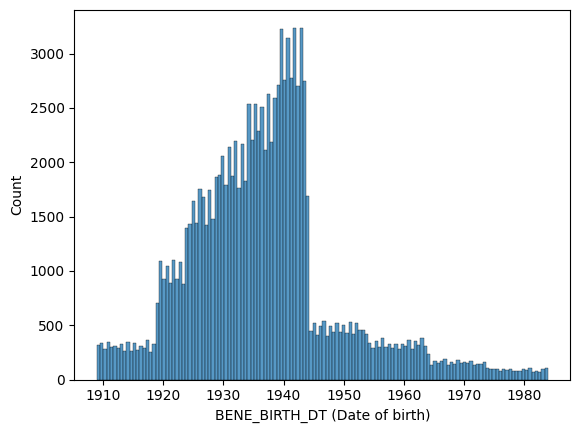

In [19]:
sns.histplot(df_beneficiary2008, x = "BENE_BIRTH_DT")
plt.xlabel("BENE_BIRTH_DT (Date of birth)")
plt.show()

BENE_SEX_IDENT_CD (Sex)
FREQUENCY
'1' = 'Male'      52005
'2' = 'Female'    64347
Name: count, dtype: int64
PERCENT
'1' = 'Male'      44.7
'2' = 'Female'    55.3
Name: proportion, dtype: float64


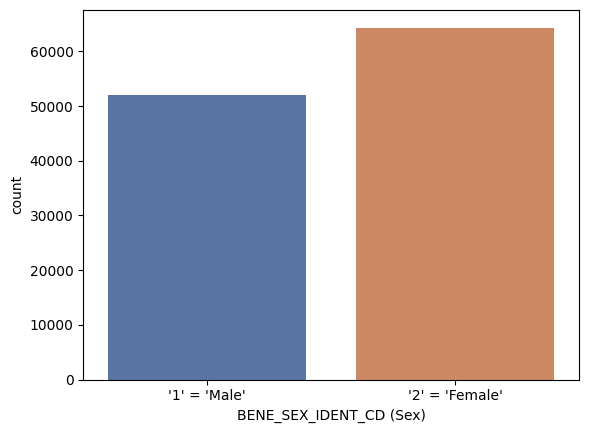

In [20]:
# Frequency distributions of select categorical variables
def freqdist(catvar, catvarlab):
    df_beneficiary2008["FREQUENCY"] = df_beneficiary2008[f"{catvar}"].map(mapping)
    df_beneficiary2008["PERCENT"] = df_beneficiary2008["FREQUENCY"]
    print(f"{catvarlab}")
    print(df_beneficiary2008["FREQUENCY"].value_counts().sort_index())
    print(df_beneficiary2008["PERCENT"].value_counts(normalize = True).mul(100).round(1).sort_index())
    category_order = sorted(df_beneficiary2008["FREQUENCY"].unique())
    sns.countplot(df_beneficiary2008, x = "FREQUENCY", hue = "FREQUENCY", order = category_order, palette = "deep", legend = False)
    plt.xlabel(f"{catvarlab}")
    plt.show()

    return None

mapping = {
    "1": "'1' = 'Male'",
    "2": "'2' = 'Female'"
}
freqdist(catvar = "BENE_SEX_IDENT_CD", catvarlab = "BENE_SEX_IDENT_CD (Sex)")

BENE_RACE_CD (Beneficiary Race Code)
FREQUENCY
'1' = 'White'       96349
'2' = 'Black'       12343
'3' = 'Others'       4931
'5' = 'Hispanic'     2729
Name: count, dtype: int64
PERCENT
'1' = 'White'       82.8
'2' = 'Black'       10.6
'3' = 'Others'       4.2
'5' = 'Hispanic'     2.3
Name: proportion, dtype: float64


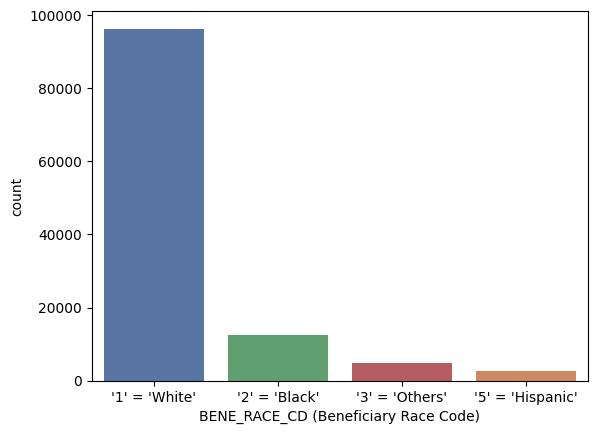

In [21]:
mapping = {
    "1": "'1' = 'White'",
    "2": "'2' = 'Black'",
    "3": "'3' = 'Others'",
    "5": "'5' = 'Hispanic'"
}
freqdist(catvar = "BENE_RACE_CD", catvarlab = "BENE_RACE_CD (Beneficiary Race Code)")

BENE_ESRD_IND (End stage renal disease Indicator)
FREQUENCY
'0' = 'No'     108091
'Y' = 'Yes'      8261
Name: count, dtype: int64
PERCENT
'0' = 'No'     92.9
'Y' = 'Yes'     7.1
Name: proportion, dtype: float64


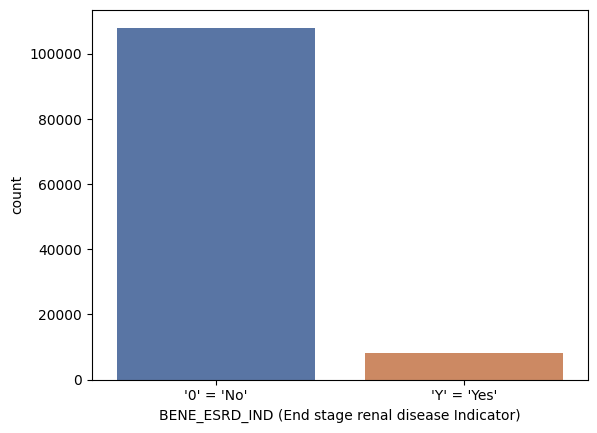

In [22]:
mapping = {
    "0": "'0' = 'No'",
    "Y": "'Y' = 'Yes'"
}
freqdist(catvar = "BENE_ESRD_IND", catvarlab = "BENE_ESRD_IND (End stage renal disease Indicator)")

SP_ALZHDMTA (Chronic Condition: Alzheimer or related disorders or senile)
FREQUENCY
1 = 'Yes'    22410
2 = 'No'     93942
Name: count, dtype: int64
PERCENT
1 = 'Yes'    19.3
2 = 'No'     80.7
Name: proportion, dtype: float64


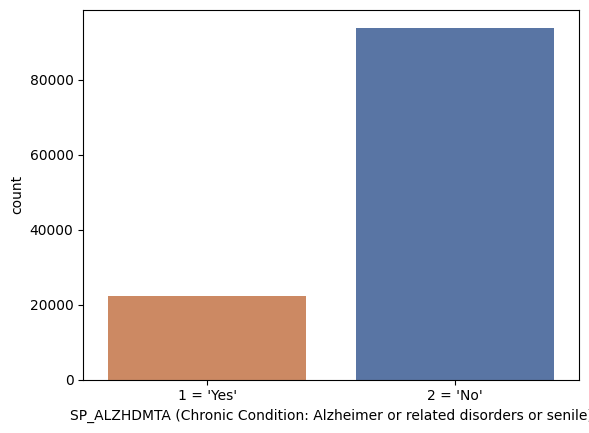

SP_CHF (Chronic Condition: Heart Failure)
FREQUENCY
1 = 'Yes'    33155
2 = 'No'     83197
Name: count, dtype: int64
PERCENT
1 = 'Yes'    28.5
2 = 'No'     71.5
Name: proportion, dtype: float64


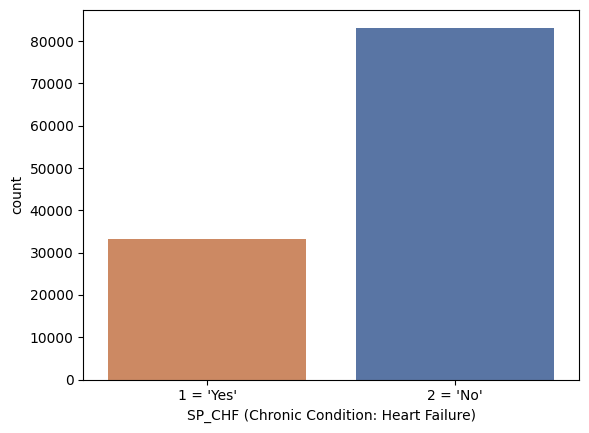

SP_CHRNKIDN (Chronic Condition: Chronic Kidney Disease)
FREQUENCY
1 = 'Yes'    18686
2 = 'No'     97666
Name: count, dtype: int64
PERCENT
1 = 'Yes'    16.1
2 = 'No'     83.9
Name: proportion, dtype: float64


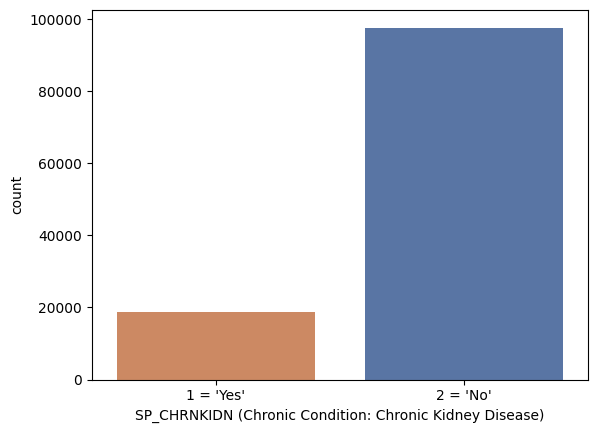

SP_CNCR (Chronic Condition: Cancer)
FREQUENCY
1 = 'Yes'      7415
2 = 'No'     108937
Name: count, dtype: int64
PERCENT
1 = 'Yes'     6.4
2 = 'No'     93.6
Name: proportion, dtype: float64


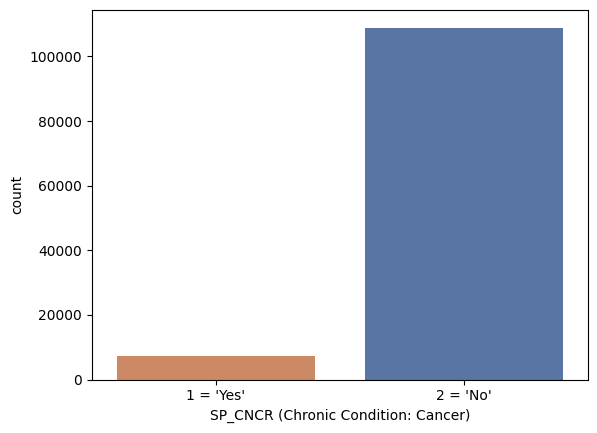

SP_COPD (Chronic Condition: Chronic Obstructive Pulmonary Disease)
FREQUENCY
1 = 'Yes'     15743
2 = 'No'     100609
Name: count, dtype: int64
PERCENT
1 = 'Yes'    13.5
2 = 'No'     86.5
Name: proportion, dtype: float64


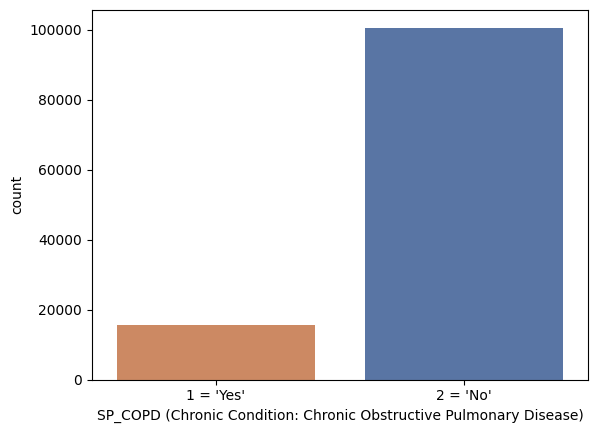

SP_DEPRESSN (Chronic Condition: Depression)
FREQUENCY
1 = 'Yes'    24840
2 = 'No'     91512
Name: count, dtype: int64
PERCENT
1 = 'Yes'    21.3
2 = 'No'     78.7
Name: proportion, dtype: float64


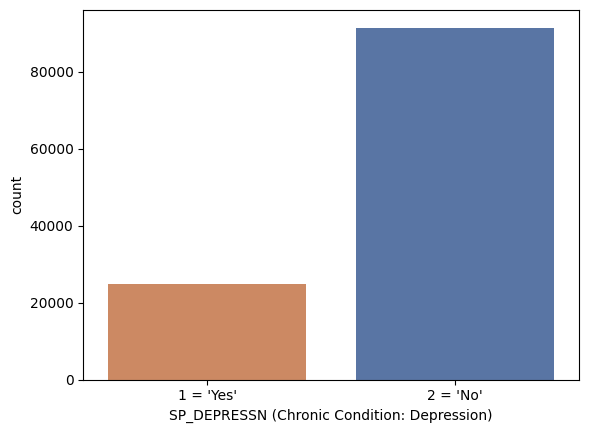

SP_DIABETES (Chronic Condition: Diabetes)
FREQUENCY
1 = 'Yes'    44060
2 = 'No'     72292
Name: count, dtype: int64
PERCENT
1 = 'Yes'    37.9
2 = 'No'     62.1
Name: proportion, dtype: float64


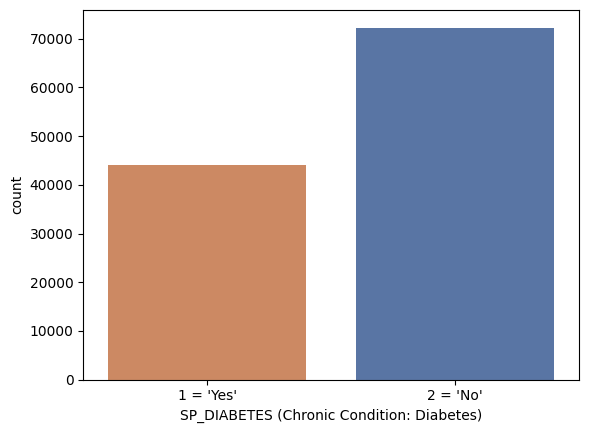

SP_ISCHMCHT (Chronic Condition: Ischemic Heart Disease)
FREQUENCY
1 = 'Yes'    48942
2 = 'No'     67410
Name: count, dtype: int64
PERCENT
1 = 'Yes'    42.1
2 = 'No'     57.9
Name: proportion, dtype: float64


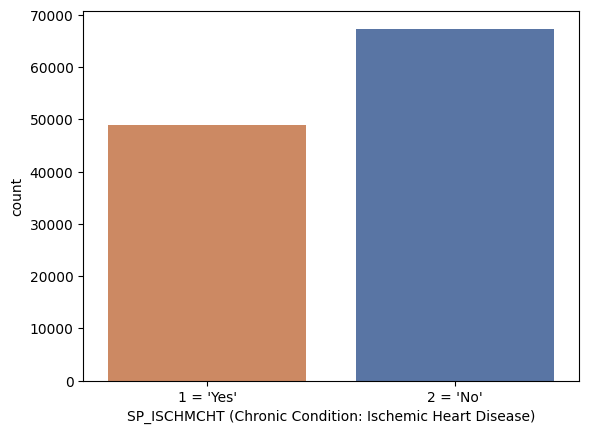

SP_OSTEOPRS (Chronic Condition: Osteoporosis)
FREQUENCY
1 = 'Yes'    20177
2 = 'No'     96175
Name: count, dtype: int64
PERCENT
1 = 'Yes'    17.3
2 = 'No'     82.7
Name: proportion, dtype: float64


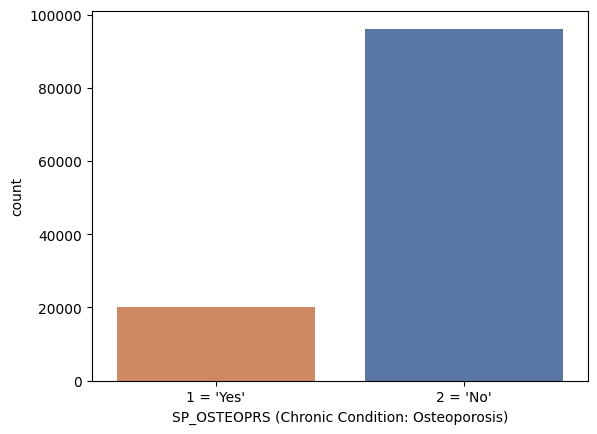

SP_RA_OA (Chronic Condition: Rheumatoid Arthritis or Osteoarthritis (RA/OA))
FREQUENCY
1 = 'Yes'    17916
2 = 'No'     98436
Name: count, dtype: int64
PERCENT
1 = 'Yes'    15.4
2 = 'No'     84.6
Name: proportion, dtype: float64


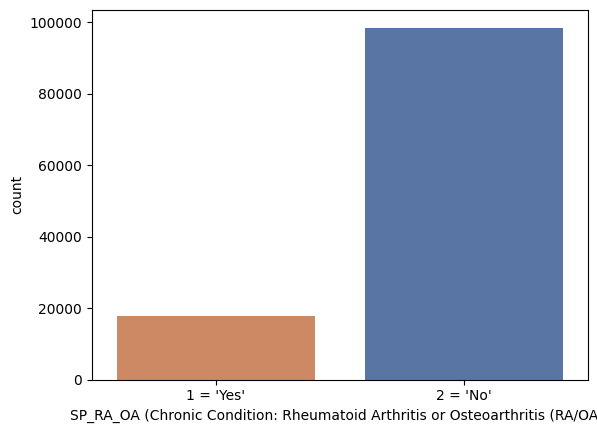

SP_STRKETIA (Chronic Condition: Stroke/transient Ischemic Attack)
FREQUENCY
1 = 'Yes'      5223
2 = 'No'     111129
Name: count, dtype: int64
PERCENT
1 = 'Yes'     4.5
2 = 'No'     95.5
Name: proportion, dtype: float64


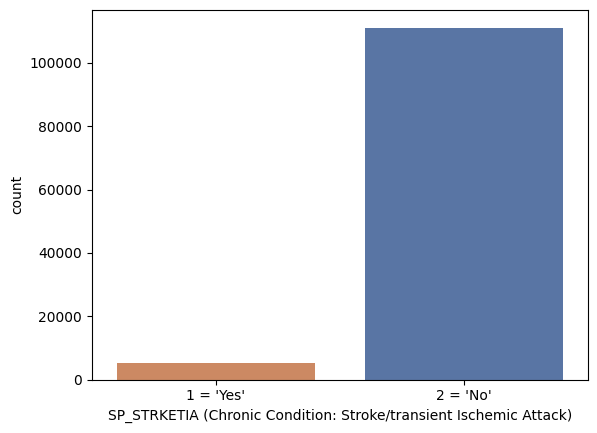

In [23]:
mapping = {
    1: "1 = 'Yes'",
    2: "2 = 'No'"
}
freqdist(catvar = "SP_ALZHDMTA", catvarlab = "SP_ALZHDMTA (Chronic Condition: Alzheimer or related disorders or senile)")
freqdist(catvar = "SP_CHF", catvarlab = "SP_CHF (Chronic Condition: Heart Failure)")
freqdist(catvar = "SP_CHRNKIDN", catvarlab = "SP_CHRNKIDN (Chronic Condition: Chronic Kidney Disease)")
freqdist(catvar = "SP_CNCR", catvarlab = "SP_CNCR (Chronic Condition: Cancer)")
freqdist(catvar = "SP_COPD", catvarlab = "SP_COPD (Chronic Condition: Chronic Obstructive Pulmonary Disease)")
freqdist(catvar = "SP_DEPRESSN", catvarlab = "SP_DEPRESSN (Chronic Condition: Depression)")
freqdist(catvar = "SP_DIABETES", catvarlab = "SP_DIABETES (Chronic Condition: Diabetes)")
freqdist(catvar = "SP_ISCHMCHT", catvarlab = "SP_ISCHMCHT (Chronic Condition: Ischemic Heart Disease)")
freqdist(catvar = "SP_OSTEOPRS", catvarlab = "SP_OSTEOPRS (Chronic Condition: Osteoporosis)")
freqdist(catvar = "SP_RA_OA", catvarlab = "SP_RA_OA (Chronic Condition: Rheumatoid Arthritis or Osteoarthritis (RA/OA))")
freqdist(catvar = "SP_STRKETIA", catvarlab = "SP_STRKETIA (Chronic Condition: Stroke/transient Ischemic Attack)")

BENEFICIARY_DEAD (Beneficiary is dead)
FREQUENCY
BENEFICIARY_DEAD
False    114538
True       1814
Name: count, dtype: int64
PERCENT
BENEFICIARY_DEAD
False    98.4
True      1.6
Name: proportion, dtype: float64


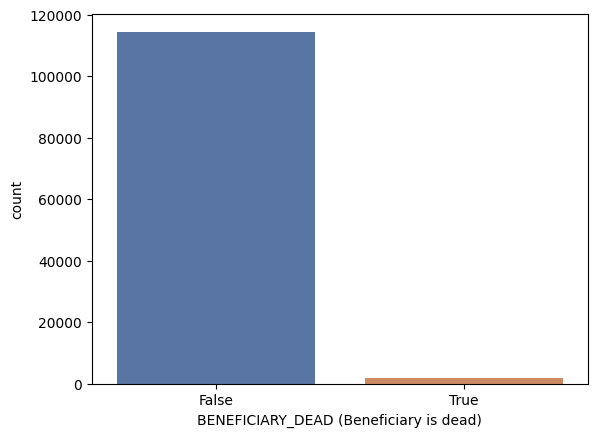

In [24]:
# Create variable indicating beneficiary death
df_beneficiary2008["BENEFICIARY_DEAD"] = df_beneficiary2008["BENE_DEATH_DT"].notnull()
print("BENEFICIARY_DEAD (Beneficiary is dead)")
print("FREQUENCY")
print(df_beneficiary2008["BENEFICIARY_DEAD"].value_counts().sort_index())
print("PERCENT")
print(df_beneficiary2008["BENEFICIARY_DEAD"].value_counts(normalize = True).mul(100).round(1).sort_index())
sns.countplot(df_beneficiary2008, x = "BENEFICIARY_DEAD", hue = "BENEFICIARY_DEAD", palette = "deep", legend = False)
plt.xlabel("BENEFICIARY_DEAD (Beneficiary is dead)")
plt.show()

In [25]:
# Create variable for beneficiary age
df_beneficiary2008["AGE"] = np.where(df_beneficiary2008["BENEFICIARY_DEAD"],
                                     (df_beneficiary2008["BENE_DEATH_DT"] - df_beneficiary2008["BENE_BIRTH_DT"]).dt.days / 365.25,
                                     (pd.to_datetime("20081231", format = "%Y%m%d") - df_beneficiary2008["BENE_BIRTH_DT"]).dt.days / 365.25)
df_beneficiary2008[["AGE"]].describe()

,AGE
count,116352.000000
mean,72.179253
std,12.508227
min,25.084189
25%,66.836413
50%,72.668036
75%,80.164271
max,99.997262


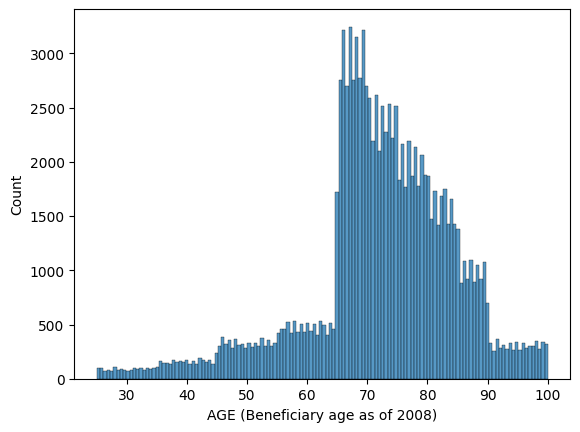

In [26]:
sns.histplot(df_beneficiary2008, x = "AGE")
plt.xlabel("AGE (Beneficiary age as of 2008)")
plt.show()

AGE_CATEGORIES (Beneficiary age as of 2008 (Categorical))
FREQUENCY
0 to lt 40      3028
40 to lt 60    11779
60 to lt 80    72192
80+            29353
Name: count, dtype: int64
PERCENT
0 to lt 40      2.6
40 to lt 60    10.1
60 to lt 80    62.0
80+            25.2
Name: proportion, dtype: float64


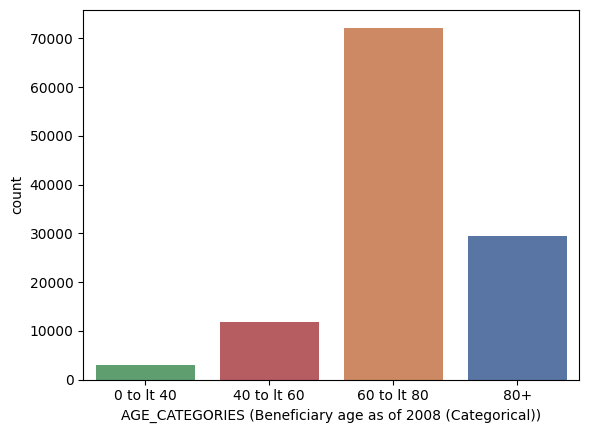

In [27]:
# Create a categorical variable for beneficiary age
df_beneficiary2008["AGE_CATEGORIES"] = np.where(df_beneficiary2008["AGE"] < 40, 1,
                                                np.where(df_beneficiary2008["AGE"] < 60, 2,
                                                         np.where(df_beneficiary2008["AGE"] < 80, 3, 4)))
mapping = {
    1: "0 to lt 40",
    2: "40 to lt 60",
    3: "60 to lt 80",
    4: "80+"
}
freqdist(catvar = "AGE_CATEGORIES", catvarlab = "AGE_CATEGORIES (Beneficiary age as of 2008 (Categorical))")

In [28]:
df_beneficiary2008.drop(columns = ["FREQUENCY", "PERCENT"], inplace = True)

In [29]:
# Create a variable identifying the type of claim
df_inpatient["CLAIM_TYPE"] = "Inpatient"
df_outpatient["CLAIM_TYPE"] = "Outpatient"

In [30]:
# Create a variable identifying the year of the claim
df_inpatient["CLAIM_YEAR"] = df_inpatient["CLM_THRU_DT"].dt.year
df_outpatient["CLAIM_YEAR"] = df_outpatient["CLM_THRU_DT"].dt.year

In [31]:
# Create a variable calculating the Medicare payment of a claim
df_inpatient["MEDREIMB"] = df_inpatient["CLM_PMT_AMT"] + (df_inpatient["CLM_PASS_THRU_PER_DIEM_AMT"] * df_inpatient["CLM_UTLZTN_DAY_CNT"])
df_outpatient["MEDREIMB"] = df_outpatient["CLM_PMT_AMT"]

In [32]:
# Create a variable calculating the beneficiary responsibility of a claim
df_inpatient["BENRES"] = df_inpatient["NCH_BENE_IP_DDCTBL_AMT"] + df_inpatient["NCH_BENE_PTA_COINSRNC_LBLTY_AM"] + df_inpatient["NCH_BENE_BLOOD_DDCTBL_LBLTY_AM"]
df_outpatient["BENRES"] = df_outpatient["NCH_BENE_BLOOD_DDCTBL_LBLTY_AM"] + df_outpatient["NCH_BENE_PTB_DDCTBL_AMT"] + df_outpatient["NCH_BENE_PTB_COINSRNC_AMT"]

In [33]:
# Append outpatient claims to inpatient claims and then keep only the claims in 2008
df_claims2008 = (pd.concat([df_inpatient, df_outpatient], ignore_index=True)
                .query("CLAIM_YEAR == 2008")
                .drop(columns = ["CLAIM_YEAR"]))
df_claims2008

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,CLAIM_TYPE,MEDREIMB,BENRES,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT
5,00052705243EA128,196991176971757,1,2008-09-12,2008-09-12,1401HG,14000.0,0.0,6132010904,NaN,...,NaN,NaN,NaN,NaN,NaN,Inpatient,14000.0,1024.0,NaN,NaN
6,0007F12A492FD25D,196661176963773,1,2008-09-19,2008-09-22,3400WD,5000.0,0.0,8956735757,6551008003,...,NaN,NaN,NaN,NaN,NaN,Inpatient,5000.0,1024.0,NaN,NaN
11,000C7486B11E7030,196641176984178,1,2008-10-15,2008-10-21,4400MM,30000.0,0.0,5520894646,6142535054,...,NaN,NaN,NaN,NaN,NaN,Inpatient,30000.0,1024.0,NaN,NaN
14,0011CB1FE23E91AF,196851176958774,1,2008-04-21,2008-04-26,2000HG,3000.0,0.0,1117398893,NaN,...,NaN,NaN,NaN,NaN,NaN,Inpatient,3000.0,1024.0,NaN,NaN
15,0011CB1FE23E91AF,196091176985832,1,2008-04-26,2008-04-30,2013RT,8000.0,0.0,8156577394,6967907523,...,NaN,NaN,NaN,NaN,NaN,Inpatient,8000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857541,FFFF7C107A4E385A,542112280991675,1,2008-11-07,2008-11-07,2100MP,80.0,0.0,4639554091,NaN,...,NaN,NaN,NaN,NaN,NaN,Outpatient,80.0,200.0,0.0,200.0
857542,FFFF7C107A4E385A,542542281225439,1,2008-11-25,2008-11-25,21006R,200.0,0.0,4919655041,NaN,...,NaN,NaN,NaN,NaN,NaN,Outpatient,200.0,0.0,0.0,0.0
857543,FFFF7C107A4E385A,542842280980325,1,2008-11-27,2008-11-27,2100JT,60.0,0.0,6098620540,NaN,...,NaN,NaN,NaN,NaN,NaN,Outpatient,60.0,30.0,0.0,30.0
857544,FFFF7C107A4E385A,542542281562850,1,2008-12-01,2008-12-01,21006R,200.0,0.0,4919655041,4919655041,...,NaN,NaN,NaN,NaN,NaN,Outpatient,200.0,90.0,0.0,90.0


In [34]:
# Merge claims data to beneficiary data
df_analysis2008 = pd.merge(df_beneficiary2008, df_claims2008, on = "DESYNPUF_ID", how = "inner")
df_analysis2008

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,CLAIM_TYPE,MEDREIMB,BENRES,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT
0,00013D2EFD8E45D1,1923-05-01,NaT,1,1,0,26,950,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,50.0,10.0,0.0,10.0
1,00024B3D2352D2D0,1936-08-01,NaT,1,1,0,52,590,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,30.0,40.0,0.0,40.0
2,0002F28CE057345B,1922-07-01,NaT,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,10.0,0.0,0.0,0.0
3,0002F28CE057345B,1922-07-01,NaT,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,60.0,50.0,0.0,50.0
4,0002F28CE057345B,1922-07-01,NaT,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,200.0,20.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309392,FFFF7C107A4E385A,1952-04-01,NaT,2,1,0,21,020,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,80.0,200.0,0.0,200.0
309393,FFFF7C107A4E385A,1952-04-01,NaT,2,1,0,21,020,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,200.0,0.0,0.0,0.0
309394,FFFF7C107A4E385A,1952-04-01,NaT,2,1,0,21,020,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,60.0,30.0,0.0,30.0
309395,FFFF7C107A4E385A,1952-04-01,NaT,2,1,0,21,020,12,12,...,NaN,NaN,NaN,NaN,NaN,Outpatient,200.0,90.0,0.0,90.0


## Section 3: Data Validation

In [35]:
# Validate the annual reimbursement amount variables in the beneficiary data by calculating the sum of the payment amounts across claims
df_validate_ip = (df_analysis2008.query("CLAIM_TYPE == 'Inpatient'")
                  .groupby("DESYNPUF_ID")[["MEDREIMB", "BENRES", "NCH_PRMRY_PYR_CLM_PD_AMT"]].sum().reset_index()
                  .rename(columns = {"MEDREIMB": "MEDREIMB_IP2", "BENRES": "BENRES_IP2", "NCH_PRMRY_PYR_CLM_PD_AMT": "PPPYMT_IP2"}))

In [36]:
df_validate_op = (df_analysis2008.query("CLAIM_TYPE == 'Outpatient'")
                  .groupby("DESYNPUF_ID")[["MEDREIMB", "BENRES", "NCH_PRMRY_PYR_CLM_PD_AMT"]].sum().reset_index()
                  .rename(columns = {"MEDREIMB": "MEDREIMB_OP2", "BENRES": "BENRES_OP2", "NCH_PRMRY_PYR_CLM_PD_AMT": "PPPYMT_OP2"}))

In [37]:
df_analysis2008 = pd.merge(df_analysis2008, df_validate_ip, on = "DESYNPUF_ID", how = "left")
df_analysis2008 = pd.merge(df_analysis2008, df_validate_op, on = "DESYNPUF_ID", how = "left")

validation_vars = ["MEDREIMB_IP2", "MEDREIMB_OP2", "BENRES_IP2", "BENRES_OP2", "PPPYMT_IP2", "PPPYMT_OP2"]
for i in validation_vars:
    df_analysis2008[f"{i}"] = df_analysis2008[f"{i}"].replace({np.nan: 0})

In [38]:
df_medreimb_ip_check = df_analysis2008.query("MEDREIMB_IP != MEDREIMB_IP2")
if not df_medreimb_ip_check.empty:
    print("Records where MEDREIMB_IP in the beneficiary data does not match the sum of Medicare reimbursement amounts across inpatient claims.")
    print(df_medreimb_ip_check)
else:
    print("MEDREIMB_IP in the beneficiary data matches the sum of Medicare reimbursement amounts across inpatient claims.")

MEDREIMB_IP in the beneficiary data matches the sum of Medicare reimbursement amounts across inpatient claims.


In [39]:
df_medreimb_op_check = df_analysis2008.query("MEDREIMB_OP != MEDREIMB_OP2")
if not df_medreimb_op_check.empty:
    print("Records where MEDREIMB_OP in the beneficiary data does not match the sum of Medicare reimbursement amounts across outpatient claims.")
    print(df_medreimb_ip_check)
else:
    print("MEDREIMB_OP in the beneficiary data matches the sum of Medicare reimbursement amounts across outpatient claims.")

MEDREIMB_OP in the beneficiary data matches the sum of Medicare reimbursement amounts across outpatient claims.


In [40]:
df_benres_ip_check = df_analysis2008.query("BENRES_IP != BENRES_IP2")
if not df_benres_ip_check.empty:
    print("Records where BENRES_IP in the beneficiary data does not match the sum of beneficiary responsibility amounts across inpatient claims.")
    print(df_benres_ip_check)
else:
    print("BENRES_IP in the beneficiary data matches the sum of beneficiary responsibility amounts across inpatient claims.")

BENRES_IP in the beneficiary data matches the sum of beneficiary responsibility amounts across inpatient claims.


In [41]:
df_benres_op_check = df_analysis2008.query("BENRES_OP != BENRES_OP2")
if not df_benres_op_check.empty:
    print("Records where BENRES_OP in the beneficiary data does not match the sum of beneficiary responsibility amounts across outpatient claims.")
    print(df_benres_op_check)
else:
    print("BENRES_OP in the beneficiary data matches the sum of beneficiary responsibility amounts across outpatient claims.")

BENRES_OP in the beneficiary data matches the sum of beneficiary responsibility amounts across outpatient claims.


In [42]:
df_pppymt_ip_check = df_analysis2008.query("PPPYMT_IP != PPPYMT_IP2")
if not df_pppymt_ip_check.empty:
    print("Records where PPPYMT_IP in the beneficiary data does not match the sum of primary payer reimbursement amounts across inpatient claims.")
    print(df_pppymt_ip_check)
else:
    print("PPPYMT_IP in the beneficiary data matches the sum of primary payer reimbursement amounts across inpatient claims.")

PPPYMT_IP in the beneficiary data matches the sum of primary payer reimbursement amounts across inpatient claims.


In [43]:
df_pppymt_op_check = df_analysis2008.query("PPPYMT_OP != PPPYMT_OP2")
if not df_pppymt_op_check.empty:
    print("Records where PPPYMT_OP in the beneficiary data does not match the sum of primary payer reimbursement amounts across outpatient claims.")
    print(df_pppymt_op_check)
else:
    print("PPPYMT_OP in the beneficiary data matches the sum of primary payer reimbursement amounts across outpatient claims.")

PPPYMT_OP in the beneficiary data matches the sum of primary payer reimbursement amounts across outpatient claims.


## Section 4: Analysis

### Table 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer

In [44]:
df_figure1 = (df_analysis2008.groupby("CLAIM_TYPE")[["MEDREIMB", "BENRES", "NCH_PRMRY_PYR_CLM_PD_AMT"]].sum()
              .rename(columns = {"MEDREIMB": "Medicare", "BENRES": "Beneficiary_Responsibility", "NCH_PRMRY_PYR_CLM_PD_AMT": "Primary_Payer"}))

df_table1 = df_figure1.copy()
df_table1["Total"] = df_table1[["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]].sum(axis = 1)
for i in ["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]:
    df_table1[f"{i}_Pct"] = (df_table1[f"{i}"] / df_table1["Total"]) * 100
df_table1.to_csv("output/table1.csv")
df_table1 = df_table1.style.format({
    "Medicare": "${:,.0f}".format,
    "Beneficiary_Responsibility": "${:,.0f}".format,
    "Primary_Payer": "${:,.0f}".format,
    "Total": "${:,.0f}".format,
    "Medicare_Pct": "{:.1f}%".format,
    "Beneficiary_Responsibility_Pct": "{:.1f}%".format,
    "Primary_Payer_Pct": "{:.1f}%".format
})
print("Table 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer")
df_table1

Table 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer


,Medicare,Beneficiary_Responsibility,Primary_Payer,Total,Medicare_Pct,Beneficiary_Responsibility_Pct,Primary_Payer_Pct
CLAIM_TYPE,,,,,,,
Inpatient,"$257,624,360","$28,977,866","$11,535,400","$298,137,626",86.4%,9.7%,3.9%
Outpatient,"$72,397,300","$22,979,780","$2,993,060","$98,370,140",73.6%,23.4%,3.0%


### Figure 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer

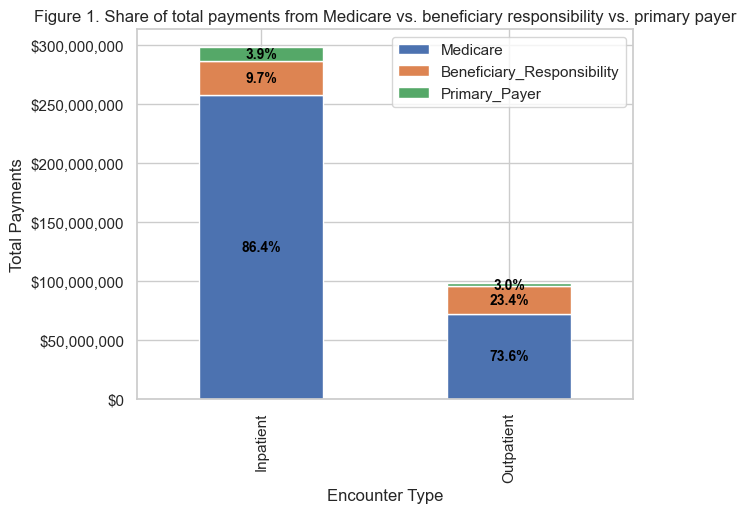

In [45]:
sns.set_theme(style = "whitegrid")
ax = df_figure1.plot.bar(stacked = True)
ax.set_title("Figure 1. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer")
ax.set_xlabel("Encounter Type")
ax.set_ylabel("Total Payments")
plt.ticklabel_format(style = "plain", axis = "y")
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# Add percentage labels
for i, claim_type in enumerate(df_figure1.index):
    total = df_figure1.loc[claim_type].sum()
    cumulative = 0

    for responsibility in df_figure1.columns:
        value = df_figure1.loc[claim_type, responsibility]
        pct = value / total * 100

        ax.text(
            i,
            cumulative + value / 2,
            f"{pct:.1f}%",
            ha='center',
            va='center',
            color='black',
            fontsize=10,
            fontweight='bold'
        )
        cumulative += value

fig1 = ax.get_figure()
fig1.savefig("output/figure1.png", bbox_inches = "tight")

### Table 2. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by age

In [46]:
df_table2_prep = df_analysis2008.copy()
age_labels = {
    1: "0 to lt 40",
    2: "40 to lt 60",
    3: "60 to lt 80",
    4: "80+"
}
df_table2_prep["AGE_GROUPS"] = df_table2_prep["AGE_CATEGORIES"].map(age_labels)

df_table2 = (df_table2_prep.groupby(["CLAIM_TYPE", "AGE_GROUPS"])[["MEDREIMB", "BENRES", "NCH_PRMRY_PYR_CLM_PD_AMT"]].sum()
              .rename(columns = {"MEDREIMB": "Medicare", "BENRES": "Beneficiary_Responsibility", "NCH_PRMRY_PYR_CLM_PD_AMT": "Primary_Payer"}))
df_table2["Total"] = df_table2[["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]].sum(axis = 1)
for i in ["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]:
    df_table2[f"{i}_Pct"] = (df_table2[f"{i}"] / df_table2["Total"]) * 100
df_table2.to_csv("output/table2.csv")
df_table2 = df_table2.style.format({
    "Medicare": "${:,.0f}".format,
    "Beneficiary_Responsibility": "${:,.0f}".format,
    "Primary_Payer": "${:,.0f}".format,
    "Total": "${:,.0f}".format,
    "Medicare_Pct": "{:.1f}%".format,
    "Beneficiary_Responsibility_Pct": "{:.1f}%".format,
    "Primary_Payer_Pct": "{:.1f}%".format
})
print("Table 2. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by age")
df_table2

Table 2. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by age


### Table 3. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by end stage renal disease

In [47]:
df_table3_prep = df_analysis2008.copy()
esrd_labels = {
    "0": "Does not have end stage renal disease",
    "Y": "Has end stage renal disease"
}
df_table3_prep["ESRD"] = df_table3_prep["BENE_ESRD_IND"].map(esrd_labels)

df_table3 = (df_table3_prep.groupby(["CLAIM_TYPE", "ESRD"])[["MEDREIMB", "BENRES", "NCH_PRMRY_PYR_CLM_PD_AMT"]].sum()
             .rename(columns = {"MEDREIMB": "Medicare", "BENRES": "Beneficiary_Responsibility", "NCH_PRMRY_PYR_CLM_PD_AMT": "Primary_Payer"}))
df_table3["Total"] = df_table3[["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]].sum(axis = 1)
for i in ["Medicare", "Beneficiary_Responsibility", "Primary_Payer"]:
    df_table3[f"{i}_Pct"] = (df_table3[f"{i}"] / df_table3["Total"]) * 100
df_table3.to_csv("output/table3.csv")
df_table3 = df_table3.style.format({
    "Medicare": "${:,.0f}".format,
    "Beneficiary_Responsibility": "${:,.0f}".format,
    "Primary_Payer": "${:,.0f}".format,
    "Total": "${:,.0f}".format,
    "Medicare_Pct": "{:.1f}%".format,
    "Beneficiary_Responsibility_Pct": "{:.1f}%".format,
    "Primary_Payer_Pct": "{:.1f}%".format
})
print("Table 3. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by end stage renal disease")
df_table3

Table 3. Share of total payments from Medicare vs. beneficiary responsibility vs. primary payer by end stage renal disease


### Table 4. Multivariable regression analysis to examine predictors of Medicare spending

In [48]:
df_model_prep = df_analysis2008.copy()
df_model_prep["ESRD_FLAG"] = np.where(df_model_prep["BENE_ESRD_IND"] == "Y", 1, 0)
df_model_prep["INPATIENT_FLAG"] = np.where(df_model_prep["CLAIM_TYPE"] == "Inpatient", 1, 0)
df_model = (df_model_prep.groupby("DESYNPUF_ID")
            .agg(
                TOTAL_MEDREIMB = ("MEDREIMB", "sum"),
                BENE_AGE = ("AGE", "first"),
                ERSD = ("ESRD_FLAG", "max"),
                INPATIENT = ("INPATIENT_FLAG", "max")
            )
            .reset_index())
X = df_model[["BENE_AGE", "ERSD", "INPATIENT"]]
X = sm.add_constant(X)
model = sm.OLS(df_model["TOTAL_MEDREIMB"], X).fit()
with open("output/table4.csv", "w") as tab4:
    tab4.write(model.summary().as_csv())
print("Table 4. Multivariable regression analysis to examine predictors of Medicare spending")
model.summary()

Table 4. Multivariable regression analysis to examine predictors of Medicare spending


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TOTAL_MEDREIMB   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 1.444e+04
Date:                Sun, 04 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:30:55   Log-Likelihood:            -6.5268e+05
No. Observations:               61991   AIC:                         1.305e+06
Df Residuals:                   61987   BIC:                         1.305e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        695.9674    210.890      3.300      0.001     282.623    1109.311
BENE_AGE      -1.3169      2.849     -0.462      0.644      -6.900       4.266
ERSD        5489.9886    114.883     47.788      0.000    5264.817    5715.160
INPATIENT   1.603e+04     85.530    187.401      0.000    1.59e+04    1.62e+04
==============================================================================
Omnibus:                    58239.086   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3494337.885
Skew:                           4.461   Prob(JB):                         0.00
Kurtosis:                      38.682   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Section 5: Methods and Limitations

Methods
- This program uses data from the Centers for Medicare & Medicaid Services’ (CMS) 2008–2010 Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF).
- The data are split into 20 samples. This program uses data from Sample 1.
- The analysis portion of this program focuses on beneficiaries in 2008 and their claims from that year.
- Although DE-SynPUF is synthetic, the data are designed to be realistic. Programs using DE-SynPUF can eventually be applied to real CMS claims data, such as CMS Limited Data Sets.

Limitations
- The synthetic nature of DE-SynPUF does not allow definitive conclusions to be drawn from the data analysis.
- DE-SynPUF represents a 5% random sample of Medicare beneficiaries in 2008. This program uses 1 of 20 subsets of DE-SynPUF. Therefore, the analysis reflects approximately 0.25% of Medicare beneficiaries in 2008.